# **WorkFlow:**

**Problem Statement: Image Classification using CNN**

1- Dataset : Cifar10

   No. of samples: 60000

   No. of target classes: 10,

   target_names=[ "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog" "Frog", "Horse", "Ship", "Truck"]

2- Load the data and split it into train,val,test and then normalize its feature pixel values.

3- Using the Hyperband (hyperparameter optimization algorithm) to search the
best hyperparameters over a defined range.

4- Then training the model using the best hyperparameters.
Training layers:


*   Conv2D : Extract the feature maps from the image
*   Maxpooling: Reduce the dimensionality of image data
*   Flatten:  To convert the list in 1D array
*   Dense: Fully connected layer that learns weights of input

5- Evaluate the model on the test data.

6- Find the different evaluation metrics and plot the loss and accuracy.






In [ ]:
#importing dependencies
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

In [ ]:
x_val.shape

(5000, 32, 32, 3)

In [ ]:
#Normalizing the pixel values
x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


# **Hyperparameter tuning:**

In [ ]:
from keras_tuner.tuners import Hyperband
def model_for_hyperparameter_searching(hp):
    model=Sequential()
    model.add(Conv2D(hp.Int('filters',min_value=32,max_value=512,step=32),(3,3),activation='relu',input_shape=(32,32,3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(hp.Int('filters',min_value=32,max_value=128,step=32),(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(hp.Int('units',min_value=64,max_value=256,step=32),activation='relu'))
    model.add(Dense(10,activation='softmax'))

    hp_learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    model.compile(optimizer=Adam(hp_learning_rate),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model



hyperparameter_search= Hyperband(model_for_hyperparameter_searching,objective='val_accuracy',max_epochs=3,hyperband_iterations=2)
hyperparameter_search.search(x_train,y_train,epochs=2,validation_data=(x_val,y_val))



Trial 12 Complete [01h 42m 13s]
val_accuracy: 0.09960000216960907

Best val_accuracy So Far: 0.6881999969482422
Total elapsed time: 06h 15m 45s


# **Training and Evaluating the model:**

In [ ]:
best_hps=hyperparameter_search.get_best_hyperparameters(num_trials=1)[0]
best_hmodel=hyperparameter_search.hypermodel.build(best_hps)
history=best_hmodel.fit(x_train,y_train,epochs=10,validation_data=(x_val,y_val))
loss,accuracy=best_hmodel.evaluate(x_test,y_test)


print('Test Loss:',loss)
print('Test Accuracy:',accuracy)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 118ms/step - accuracy: 0.4015 - loss: 1.6429 - val_accuracy: 0.6102 - val_loss: 1.1182
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 118ms/step - accuracy: 0.6333 - loss: 1.0526 - val_accuracy: 0.6494 - val_loss: 0.9990
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 209s 122ms/step - accuracy: 0.6964 - loss: 0.8718 - val_accuracy: 0.6892 - val_loss: 0.8899
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 192s 123ms/step - accuracy: 0.7369 - loss: 0.7506 - val_accuracy: 0.6842 - val_loss: 0.9206
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 119ms/step - accuracy: 0.7737 - loss: 0.6425 - val_accuracy: 0.7120 - val_loss: 0.8627
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 123ms/step - accuracy: 0.8083 - loss: 0.5514 - val_accuracy: 0.6988 - val_loss: 0.9359
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 198s 120ms/step - accuracy: 0.8346 - loss: 0.4726 - val_accuracy: 0.6966 - val_loss: 0.9439
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - ac

In [ ]:
hyperparameter_search.save('model_checkpoint.h5')  # Save the model to a file


# **Evaluation Metrics:**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred=best_hmodel.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_true=y_test.flatten()
cm=confusion_matrix(y_true,y_pred)
print('Confusion matrix:  \n')
print(cm)

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step
Confusion matrix:  

[[422  11  26   0   1   5   4   4  33  15]
 [ 18 416   4   2   0   2   1   0  23  48]
 [ 37   6 306  15  32  15  25  16  14   9]
 [ 31   8  53 200  34  79  28  29  23  15]
 [ 24   0  59  22 325   6  16  29   8   5]
 [ 24   8  69  79  20 269   6  26  17   4]
 [ 13   8  39  27  20  11 357   4   7   3]
 [ 18   5  35   8  26  12   2 356   3   7]
 [ 37  15   7   0   2   1   0   3 430  16]
 [ 20  42   3   2   3   0   0   6  22 404]]


In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_true,y_pred, target_names=[ "Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"])
print('Classification Report:  \n')
print(cr)

Classification Report:  

              precision    recall  f1-score   support

    Airplane       0.66      0.81      0.72       521
  Automobile       0.80      0.81      0.81       514
        Bird       0.51      0.64      0.57       475
         Cat       0.56      0.40      0.47       500
        Deer       0.70      0.66      0.68       494
         Dog       0.67      0.52      0.58       522
        Frog       0.81      0.73      0.77       489
       Horse       0.75      0.75      0.75       472
        Ship       0.74      0.84      0.79       511
       Truck       0.77      0.80      0.79       502

    accuracy                           0.70      5000
   macro avg       0.70      0.70      0.69      5000
weighted avg       0.70      0.70      0.69      5000



# **Visualization:**

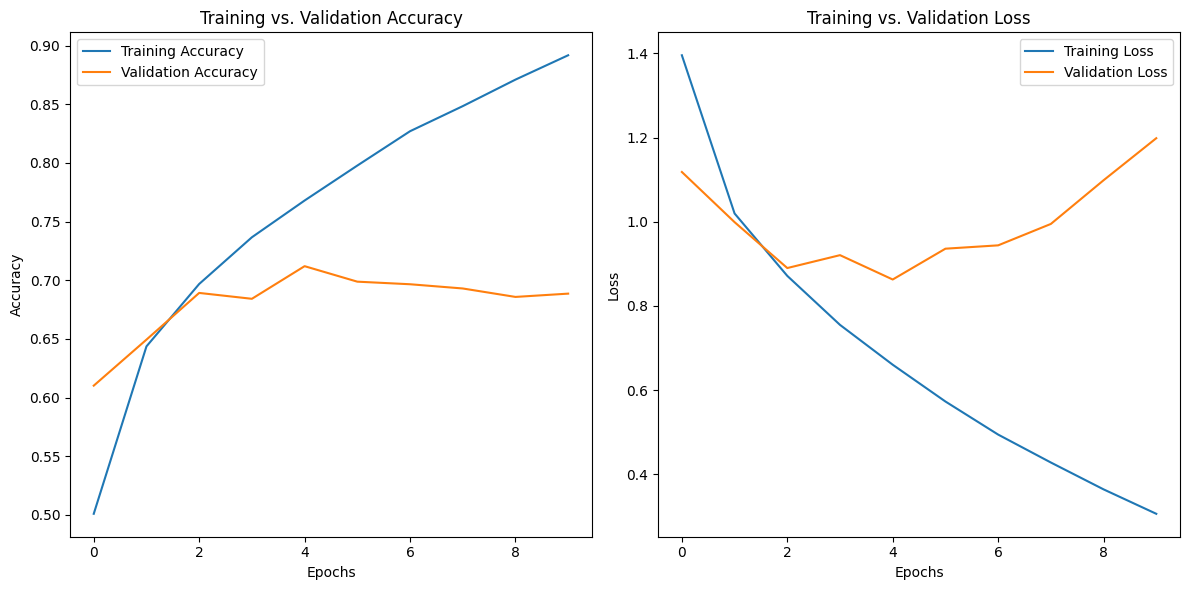

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.tight_layout()
plt.show()
